In [16]:
import nextnanopy as nn
import os
import matplotlib.pyplot as plt
import numpy as np
import sys


In [17]:
print(sys.path)
sys.path.append(r"C:\Users\splatt\nextnanopy_projects")
print(sys.path)
from nextnano_tools.helper_functions import build_output
from nextnano_tools.simstructs import SimOut, BandStructure, Eigenstate

['c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\python313.zip', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\DLLs', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv', '', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\splatt\\nextnanopy_projects', 'C:\\Users\\splatt\\nextnanopy_projects']
['c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\python313.zip', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\DLLs', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv', '', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoenv\\Lib\\site-packages', 'c:\\Users\\splatt\\miniconda3\\envs\\nextnanoen

In [39]:
# base_file_path = r"C:\Users\splatt\Documents\nextnano\Output\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template\InGaAsInAlAs_6nm_valence_band_anticrossing_check_sweep_template.nnp"
# base_filename = 'InGaAsInAlAs_thinner_valencesubbands_quantumonly_check_maxVB'
# parent_dir = r'C:\Users\splatt\Documents\nextnano\Output\check_density_InGaAsInAlAs'

# input_filepath = os.path.join(parent_dir, base_filename + '.nnp')
sweep_base_filename = 'InGaAsInAlAs_2ddensity'
input_filename = sweep_base_filename + '.nnp'
generic_nextnano_output_dir = r"C:\Users\splatt\Documents\nextnano\Output"
output_basepath = os.path.join(generic_nextnano_output_dir,sweep_base_filename)
density_input = nn.InputFile(input_filename,product='nextnano++')
# print(base_file_input)

In [40]:
VB_cutoff = 0.4
bias = r'bias_00000'
quantum_region = r'Quantum\quantum_region'
quantum_band = r'kp8'
quantum_band_interactions = r'kp8_kp8'
output_basepath

'C:\\Users\\splatt\\Documents\\nextnano\\Output\\InGaAsInAlAs_2ddensity'

In [55]:

densities2d = [1.25e12,1.5e12,1.75e12,2.0e12] #in cm^-2
# simout = build_output(parent_dir,quantum_region,quantum_band,quantum_band_interactions,bias,VB_cutoff,6.0)
# simouts = []
for density2d in densities2d:
    w_delta_donor = 2e-9 #m
    w_delta_donor_cm = w_delta_donor*1e2  #in cm
    n3dinvcc = density2d / w_delta_donor_cm  #in cm^-3
    #get density from either side
    density_input.set_variable('conccc',n3dinvcc/2)
    print(f"Setting conc to {n3dinvcc/2:.2e} cm^-3 for 2D density {density2d:.2e} cm^-2")
    density_input.set_variable('delta_donor_w',w_delta_donor*1e9)  #in nm
    input_filesavename = str(density2d/1e11)+'e11cm2'
    subfolder_to_save = os.path.join(output_basepath,input_filesavename)
    print(f"Saving to subfolder {subfolder_to_save}")
    density_input.save(os.path.join(subfolder_to_save,input_filesavename+'.nnp'),overwrite=True)
    print(density_input)
    density_input.execute() #would need to set different output next time
    # simout = build_output(subfolder_to_save,quantum_region,quantum_band,quantum_band_interactions,bias,VB_cutoff,6.0)
    # simout.bands['VB'].sort_subbands(decreasing=True)
    # VB_subbands = simout.bands["VB"].get_energies()  # list of Eigenstate objects
    # CB_subbands = simout.bands["CB"].get_energies()      # all CB subbands
    # VB_mesh, CB_mesh = np.meshgrid(VB_subbands, CB_subbands)
    # transition_energies = CB_mesh - VB_mesh # Transpose VB mesh to get correct orientation
    # # Print transition table
    # print("\nTransition Energies Table for 2D Density: {:.2e} cm^-2".format(density2d))
    # print(" VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)")
    # print("-" * 55)
    # for i, cb in enumerate(CB_subbands):
    #     for j, vb in enumerate(VB_subbands):
    #         print(f" {vb:12.4f} ({j+1}) | {cb:12.4f} ({i+1}) | {transition_energies[i,j]:19.4f}")

    

Setting conc to 3.12e+18 cm^-3 for 2D density 1.25e+12 cm^-2
Saving to subfolder C:\Users\splatt\Documents\nextnano\Output\InGaAsInAlAs_2ddensity\12.5e11cm2
InputFile
fullpath: C:\Users\splatt\Documents\nextnano\Output\InGaAsInAlAs_2ddensity\12.5e11cm2\12.5e11cm2.nnp
Input variables: 23 elements
	$run_optics = 0 # if 1 then calculate optical absorption, if 0 the not (ListOfValues:0,1)
	$SELF_CONSISTENT = 1
	$temperature = 100.0 # temperature of the system (DisplayUnit:K)
	$w_well = 6.0 # width of In(0.2)Ga(0.8)As well           (DisplayUnit:nm)
	$w_barrier = 10.0 # width of GaAs barrier                  (DisplayUnit:nm)
	$Al_alloy = 0.48 # Al content in AlInAas alloy (DisplayUnit:mole fraction)
	$In_alloy = 0.52 # In content in InGaAs
	$GRID_BUFFER = 6.0
	$FINE_RES = 0.25 # grid spacing around the quantum well (DisplayUnit:nm)
	$COARSE_RES = 2.0 # grid spacing away from the quantum well (DisplayUnit:nm)
	$eigen_e = 4 # number of eigenvalues to be calculated for conduction bands at each

In [ ]:
# simout.bands['VB'].sort_subbands(decreasing=True)
# print(simout.hole_Fermi_level)
# simout.bands['VB'].remove_subband()

0.0


In [14]:
# simout.bands['VB'].remove_subband(index=5)

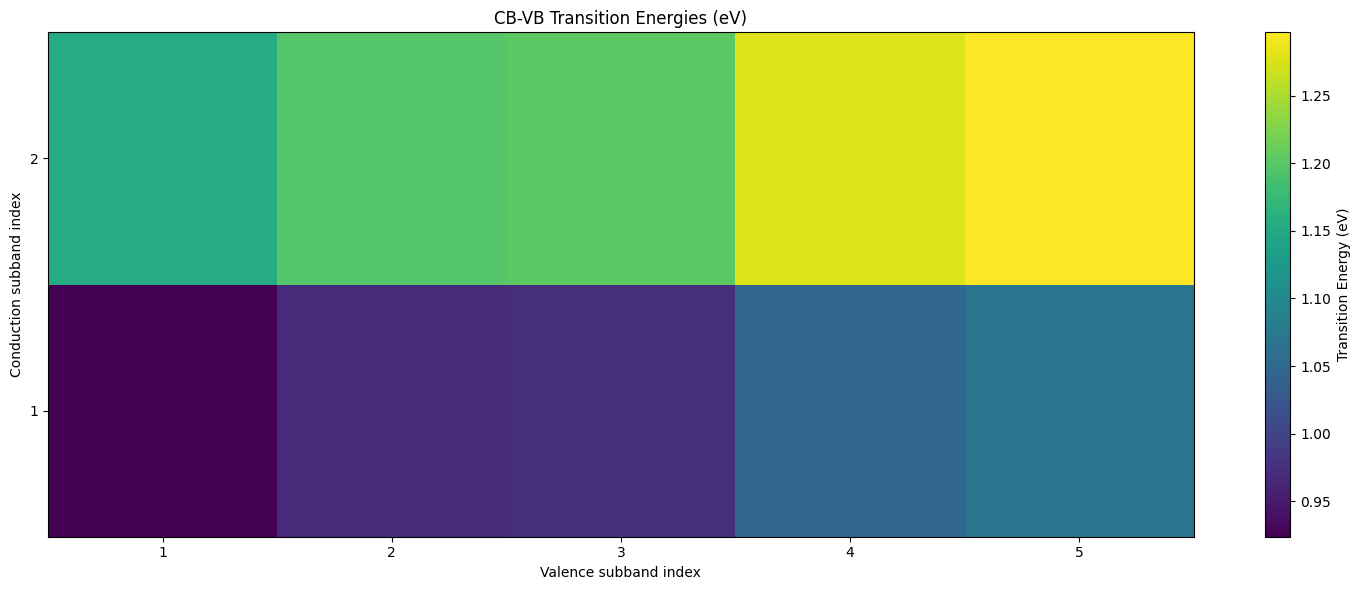


Transition Energies Table:
 VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)
-------------------------------------------------------
      -0.0062 (1) |       0.9177 (1) |              0.9239
      -0.0500 (2) |       0.9177 (1) |              0.9677
      -0.0555 (3) |       0.9177 (1) |              0.9732
      -0.1299 (4) |       0.9177 (1) |              1.0476
      -0.1491 (5) |       0.9177 (1) |              1.0668
      -0.0062 (1) |       1.1476 (2) |              1.1538
      -0.0500 (2) |       1.1476 (2) |              1.1977
      -0.0555 (3) |       1.1476 (2) |              1.2031
      -0.1299 (4) |       1.1476 (2) |              1.2775
      -0.1491 (5) |       1.1476 (2) |              1.2967


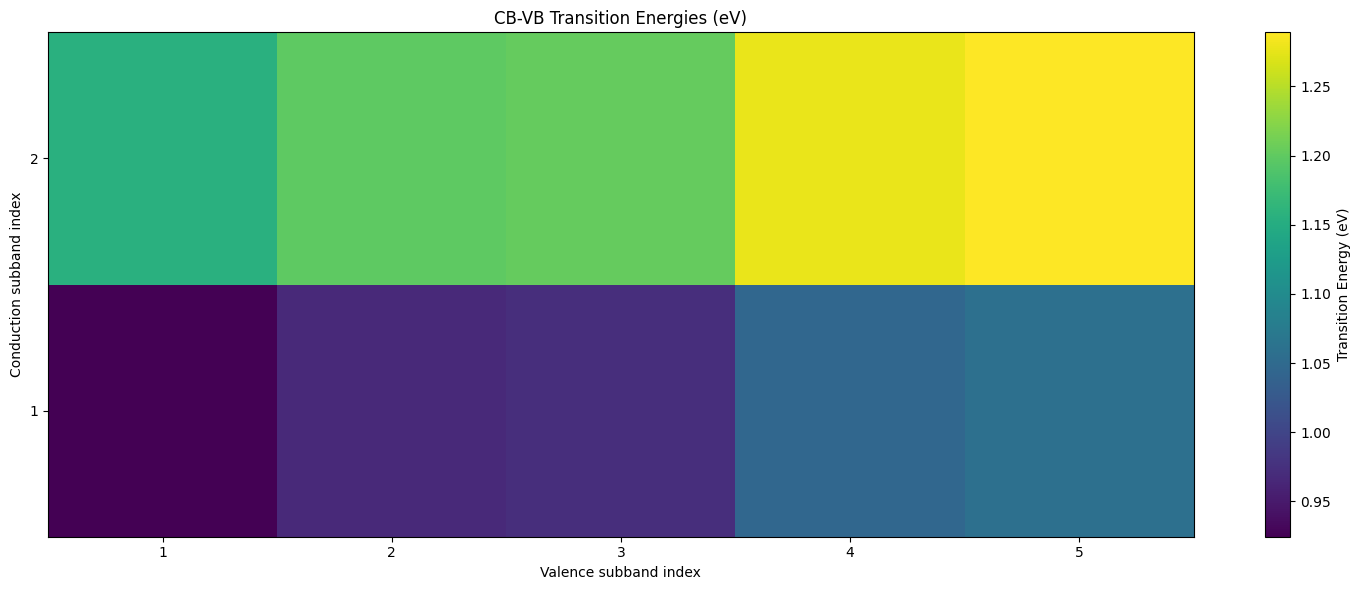


Transition Energies Table:
 VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)
-------------------------------------------------------
       0.0004 (1) |       0.9249 (1) |              0.9244
      -0.0419 (2) |       0.9249 (1) |              0.9668
      -0.0472 (3) |       0.9249 (1) |              0.9720
      -0.1200 (4) |       0.9249 (1) |              1.0448
      -0.1327 (5) |       0.9249 (1) |              1.0575
       0.0004 (1) |       1.1565 (2) |              1.1561
      -0.0419 (2) |       1.1565 (2) |              1.1984
      -0.0472 (3) |       1.1565 (2) |              1.2037
      -0.1200 (4) |       1.1565 (2) |              1.2764
      -0.1327 (5) |       1.1565 (2) |              1.2891


In [ ]:
# Create transition energy heatmap
import numpy as np

for simout in simouts:

    VB_subbands = simout.bands["VB"].get_energies()  # list of Eigenstate objects
    CB_subbands = simout.bands["CB"].get_energies()      # all CB subbands
    VB_mesh, CB_mesh = np.meshgrid(VB_subbands, CB_subbands)
    transition_energies = CB_mesh - VB_mesh # Transpose VB mesh to get correct orientation
    # Print transition table
    print("\nTransition Energies Table:")
    print(" VB Energy (eV) (subband num) | CB Energy (eV) (subband num) | Transition Energy (eV)")
    print("-" * 55)
    for i, cb in enumerate(CB_subbands):
        for j, vb in enumerate(VB_subbands):
            print(f" {vb:12.4f} ({j+1}) | {cb:12.4f} ({i+1}) | {transition_energies[i,j]:19.4f}")